In [1]:
from epd_plot_shift import *

In [2]:
# Path to the solo data files.
data_path = r'C:/Users/Omistaja/Desktop/SRL/2021SRL/epd_plot-main/solo-loader-main/data/'

# Path to where images and .csv -files will be saved.
image_path = r'C:/Users/Omistaja/Desktop/SRL/2021SRL/epd_plot-main/solo_loader-main-shift/image/9-Oct-21/'
csv_path = r'C:/Users/Omistaja/Desktop\SRL/2021SRL/epd_plot-main/solo_loader-main-shift/csv/9-Oct-21/'

In [9]:
# Start and end day. Format: yyyymmdd.
start_date = 20211009
end_date = 20211009

# plot start and end format 'YYYY-MM-DD-HHmm'
plot_start = '2021-10-09-0200'
plot_end = '2021-10-09-1100'

# Backgroud window:
# Default values: bg_start= None, bg_end = None, bg_distance_from_window = None, bg_period = None
# You can either specify a time period by using the same format as for plot_start and plot_end for bg_start and bg_end
# If you specify bg_start and bg_end set bg_distance_from_window and bg_period to None
# For a moving background window set bg_start and bg_end to None and specify bg_distance_from_window and bg_period
# bg_distance_from_window is the distance of the background window start time from the peak window
# the input for bg_distance_from_window is in minutes
# bg_period is the length of the bg in minutes
# by specifying bg_distance_from_window and bg_period the bg will follow the first slope of the peak window
bg_start = None #'2021-10-09-0400' 
bg_end = None #'2021-10-09-0500'
bg_distance_from_window = 120
bg_period = 90 

# injection time Format: yyyymmdd.
t_inj = '2021-10-09-0630'

# For a fixed non sliding window input travel_distance = 0, 
# travel_distance_second_slope = None, fixed_window = period in minutes
# For a fixed sliding window input travel_distance = distance in AU,
# travel_distance_second_slope = None, fixed_window = period in minutes
# for two slopes input travel_distance = distance in AU, 
# travel_distance_second_slope = distance 2 in AU, fixed_window = None
travel_distance = 0.7
travel_distance_second_slope = 1.7 
fixed_window = None #either input time period in minutes or None
frac_nan_threshold = 0.9  # exclude all spectrum values with fraction of non-nan data points in search period lower than this



# Averaging. 'mean' = rolling mean, 'none' = no averaging.
averaging_mode = 'mean'
averaging = 5

In [10]:
# Toggle individual instruments. For use if for example one instrument doesn't have data yet.
ept = True
het = True
step = True

# Toggles the step masking from Ninas function. No reason to be False.
step_masking = True

In [11]:
# Toggle saving of the images and .csv -files.
saving = False
autodownload_data = True

direction = 'south'

## STEP

DatetimeIndex(['2021-10-09 00:01:16.553000', '2021-10-09 00:01:26.553000',
               '2021-10-09 00:01:36.553000', '2021-10-09 00:01:46.553000',
               '2021-10-09 00:01:56.553000', '2021-10-09 00:02:06.553000',
               '2021-10-09 00:02:16.553000', '2021-10-09 00:02:26.553000',
               '2021-10-09 00:02:36.553000', '2021-10-09 00:02:46.553000',
               ...
               '2021-10-09 23:59:36.701000', '2021-10-09 23:59:46.701000',
               '2021-10-09 23:59:56.701000', '2021-10-10 00:00:06.701000',
               '2021-10-10 00:00:16.701000', '2021-10-10 00:00:26.701000',
               '2021-10-10 00:00:36.701000', '2021-10-10 00:00:46.701000',
               '2021-10-10 00:00:56.701000', '2021-10-10 00:01:06.701000'],
              dtype='datetime64[ns]', length=8640, freq=None)


C:\Users\Omistaja\Documents\GitHub\epd-load-n-plot\epd_plot_shift.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electron_fluxes[df_electron_fluxes<0] = np.NaN
C:\Users\Omistaja\Anaconda3\lib\site-packages\pandas\core\frame.py:3713: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


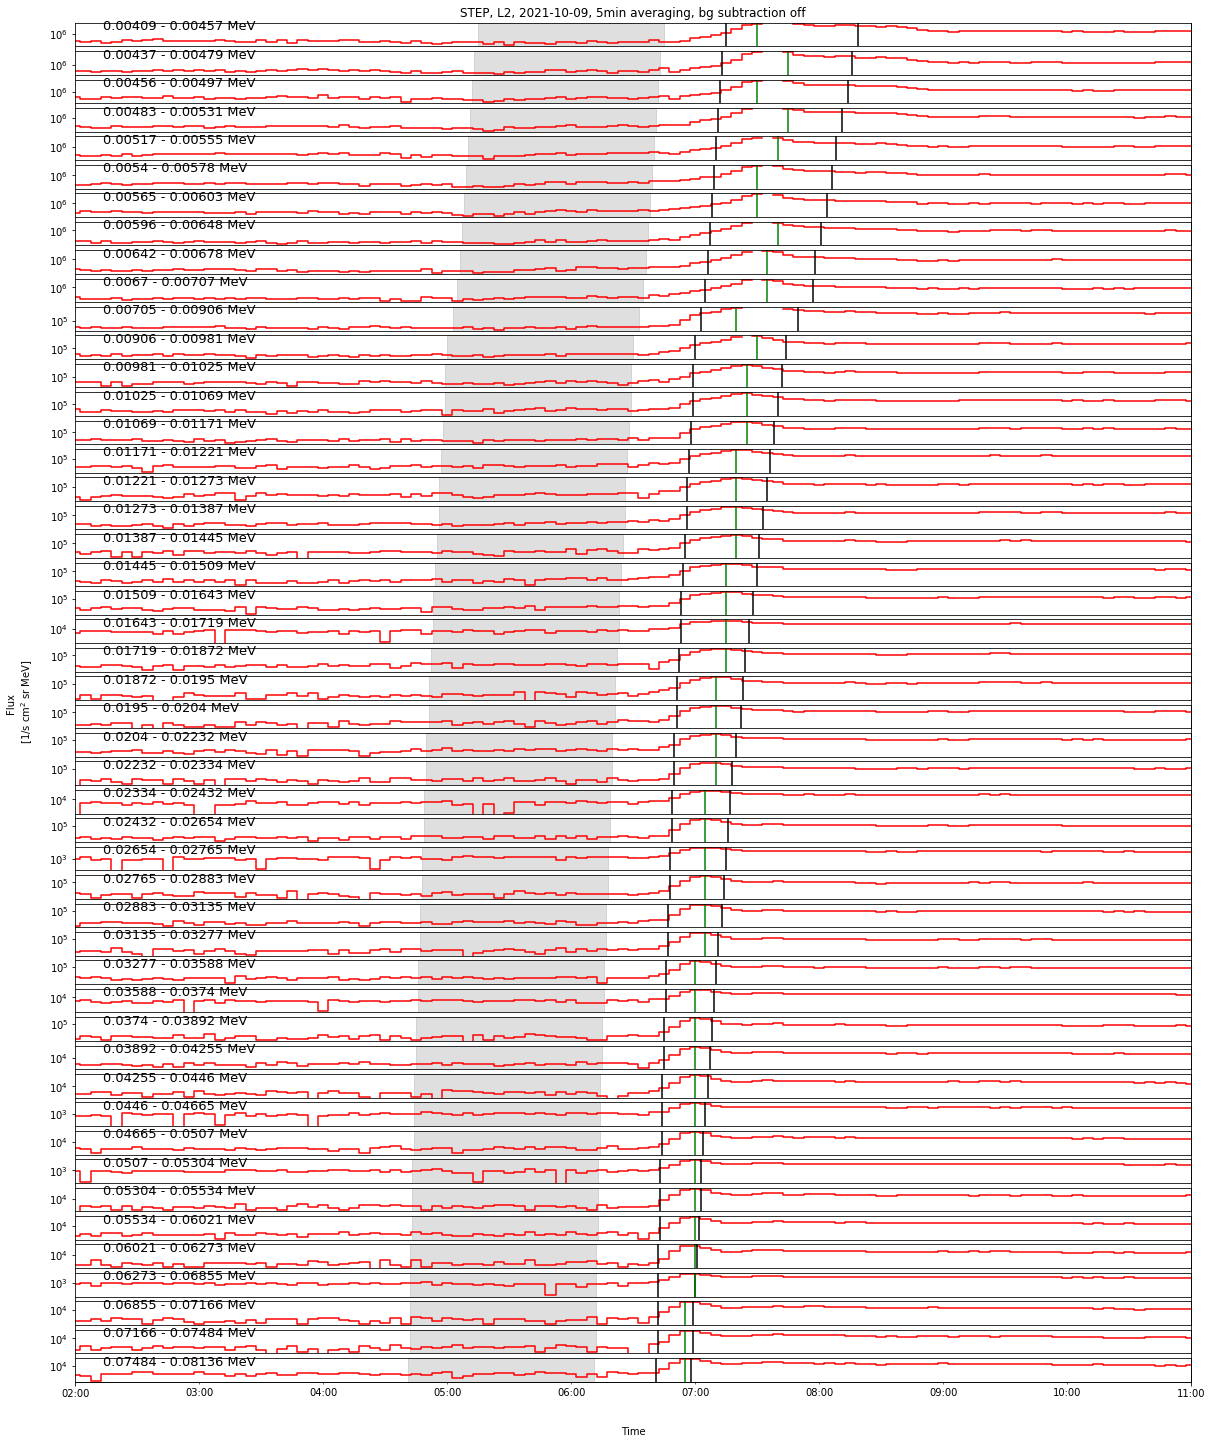

C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


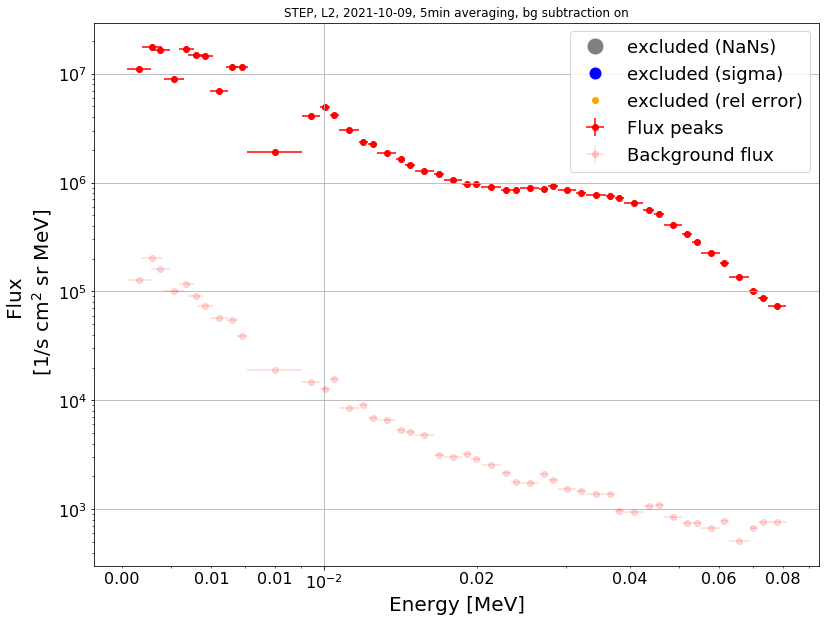

In [12]:
if(step):
    df_particles_step, energies_step = epd_load(sensor='step', viewing='sun', level='l2', startdate=start_date, enddate=end_date, path=data_path, autodownload=True)
    data_step = extract_step_data(df_particles_step, plot_start, plot_end, t_inj, bgstart = bg_start , bgend = bg_end, bg_distance_from_window = bg_distance_from_window, bg_period = bg_period, travel_distance = travel_distance, travel_distance_second_slope = travel_distance_second_slope, fixed_window = fixed_window, instrument = 'step', data_type = 'l2', averaging_mode=averaging_mode, averaging=averaging, masking=step_masking)
    if saving: write_to_csv(data_step, path=csv_path)
    #for bg_b in [False, True]:
    bg_b = False
    plot_channels(data_step, bg_subtraction=bg_b, path=image_path, savefig=saving)
    bg_b = True
    plot_spectrum_peak(data_step, bg_subtraction=bg_b, path=image_path, savefig=saving)

## EPT

C:\Users\Omistaja\Anaconda3\lib\site-packages\heliopy\data\util.py:849: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{df_key}_{i}'] = data
C:\Users\Omistaja\Anaconda3\lib\site-packages\heliopy\data\util.py:844: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[df_key] = data


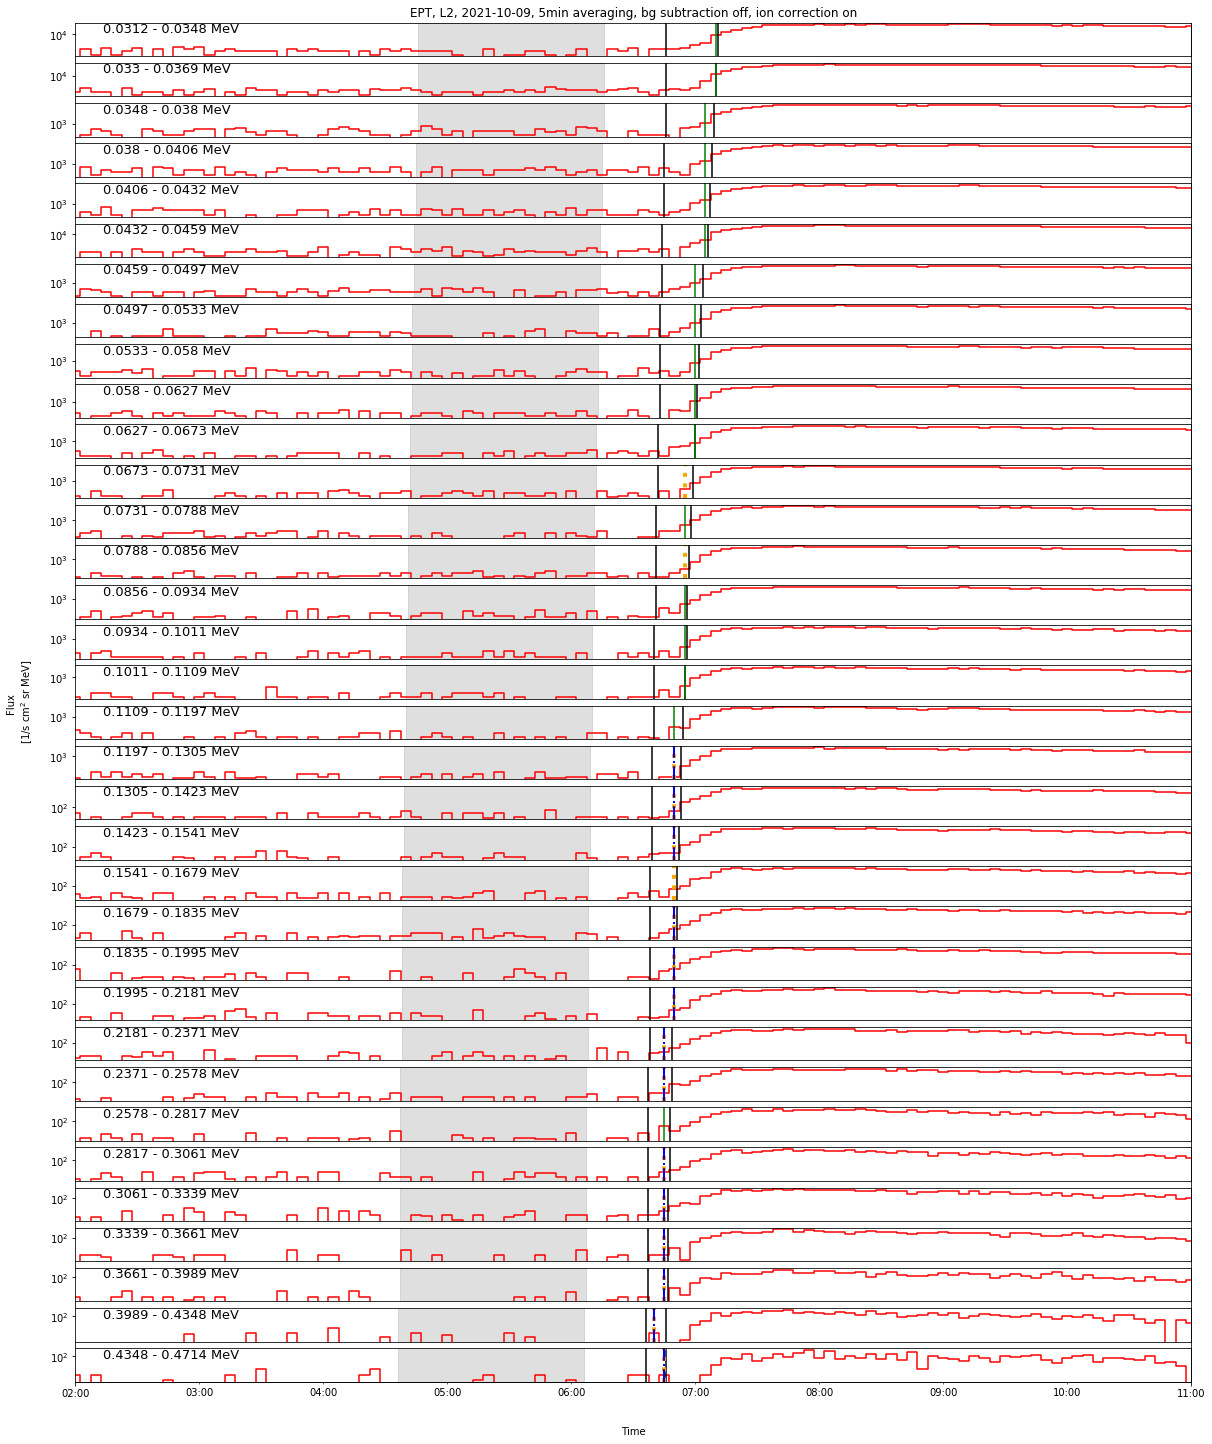

C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


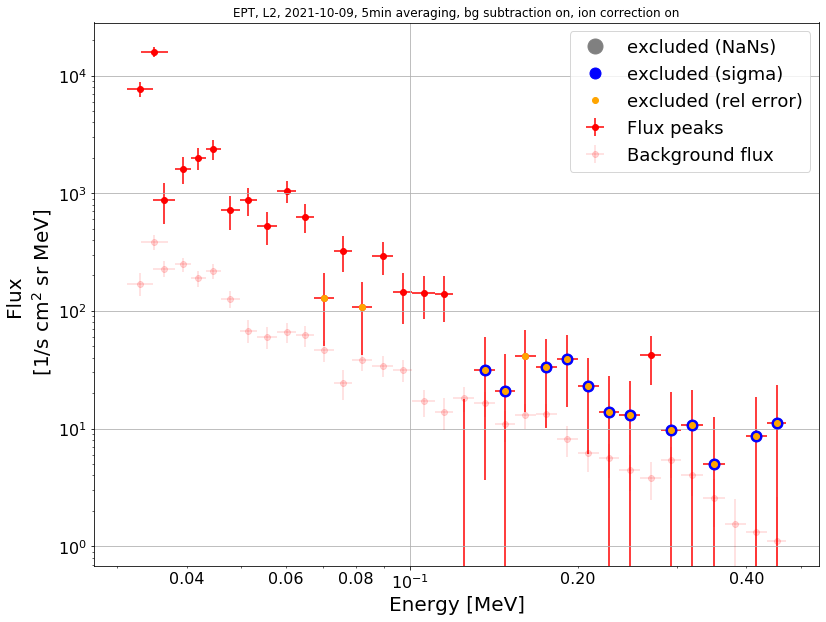

0     2192.039590
1     3937.948914
2      274.966017
3      522.355708
4      752.312615
5      768.792176
6      264.317935
7      285.192795
8      155.687731
9      287.963803
10     295.933993
11      47.011184
12     160.690093
13      39.332652
14     141.336711
15      60.181199
16      68.705092
17      61.782259
18      -7.910177
19       8.801341
20      19.265273
21      21.657892
22      12.832226
23      22.133725
24       9.157503
25      12.796165
26      12.193278
27      18.747666
28       5.829686
29       7.019842
30       4.975325
31      -1.548856
32       3.664564
33       4.762054
Name: Bg_subtracted_average, dtype: float64


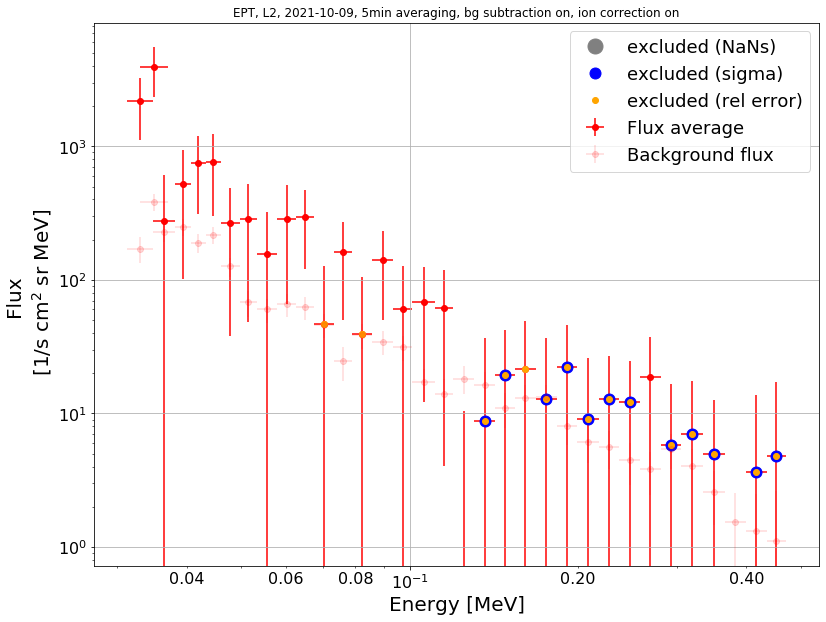

In [13]:
if(ept):
    df_protons_ept, df_electrons_ept, energies_ept = read_epd_cdf('ept', direction, 'l2', start_date, end_date, path=data_path, autodownload=True)
    #for ion_b in [False, True]:
    ion_b = True    
    data_ept = extract_data(df_protons_ept, df_electrons_ept, plot_start, plot_end, t_inj, bgend = bg_end, bg_distance_from_window = bg_distance_from_window, bg_period = bg_period,  travel_distance = travel_distance, travel_distance_second_slope=travel_distance_second_slope, fixed_window=fixed_window, instrument = 'ept', data_type = 'l2', averaging_mode=averaging_mode, averaging=averaging, masking=step_masking, ion_conta_corr=ion_b)
    if saving: write_to_csv(data_ept, path=csv_path)
    #for bg_b in [False, True]:
    bg_b = False
    plot_channels(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving, frac_nan_threshold=frac_nan_threshold, rel_err_threshold=0.5)
    bg_b = True
    plot_spectrum_peak(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving, frac_nan_threshold=frac_nan_threshold) 
    plot_spectrum_average(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving, frac_nan_threshold=frac_nan_threshold)      

## HET

C:\Users\Omistaja\Anaconda3\lib\site-packages\heliopy\data\util.py:849: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{df_key}_{i}'] = data
C:\Users\Omistaja\Anaconda3\lib\site-packages\heliopy\data\util.py:844: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[df_key] = data


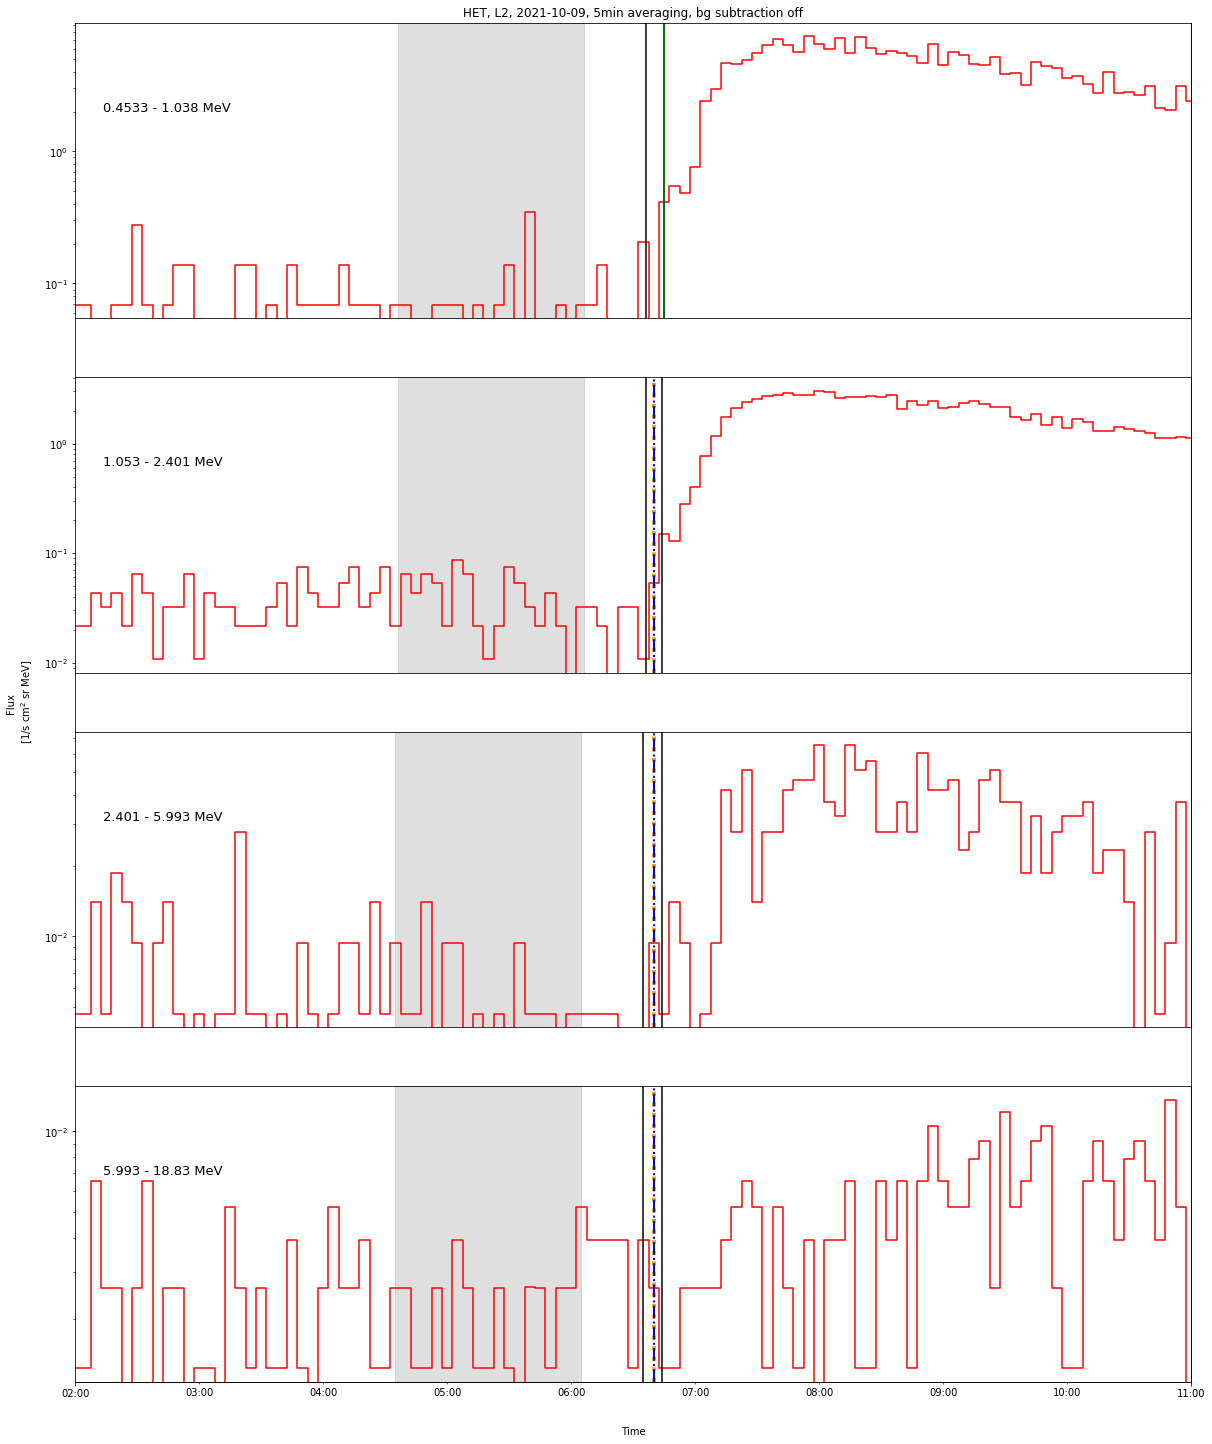

C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


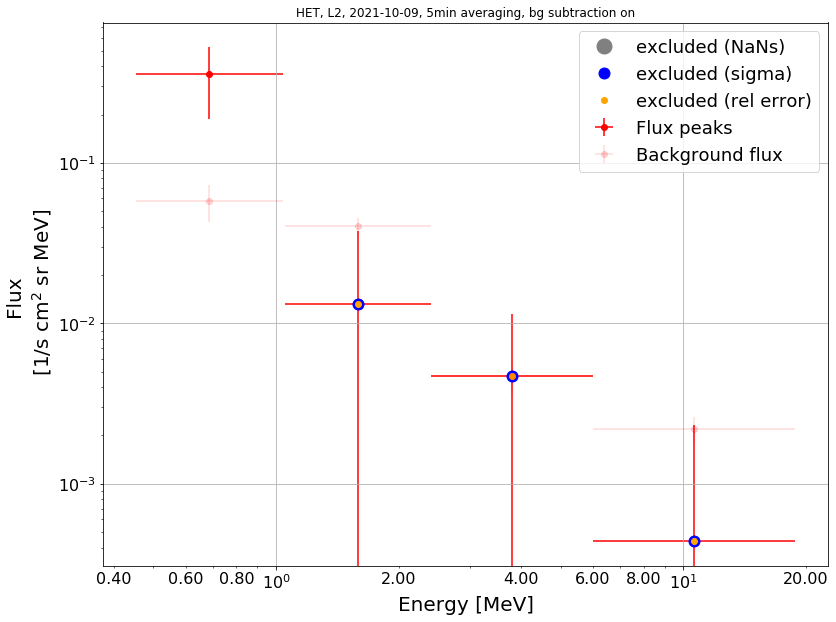

In [14]:
if(het):
    df_protons_het, df_electrons_het, energies_het = read_epd_cdf('het', direction, 'l2', start_date, end_date, path=data_path, autodownload=True)
    data_het = extract_data(df_protons_het, df_electrons_het, plot_start, plot_end, t_inj, bgstart = bg_start, bgend = bg_end,  bg_distance_from_window = bg_distance_from_window,bg_period = bg_period, travel_distance = travel_distance, travel_distance_second_slope = travel_distance_second_slope, fixed_window = fixed_window, instrument='het', data_type='l2', averaging_mode=averaging_mode, averaging=averaging)
    if saving: write_to_csv(data_het, path=csv_path)
    #for bg_b in [False, True]:
    bg_b = False    
    plot_channels(data_het, bg_subtraction=bg_b, path=image_path, savefig=saving)
    bg_b = True
    plot_spectrum_peak(data_het, bg_subtraction=bg_b, path=image_path, savefig=saving)